<a href="https://colab.research.google.com/github/MoTohamy03/Data-Analysis-and-ML-projects/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('car_evaluation.csv', header = None) # header = None make it
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
# Note that our data has no names for columns >> so we need to name it.
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.shape

(1728, 7)

In [ ]:
df['buying'].value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [ ]:
df['maint'].value_counts()

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [ ]:
df.value_counts()

buying  maint  doors  persons  lug_boot  safety  class
high    high   2      2        big       high    unacc    1
med     med    4      4        med       med     acc      1
                      more     small     low     unacc    1
                                         high    acc      1
                               med       med     acc      1
                                                         ..
low     low    3      2        med       med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
                               big       med     unacc    1
vhigh   vhigh  5more  more     small     med     unacc    1
Name: count, Length: 1728, dtype: int64

In [ ]:
df['doors'].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [ ]:
df['persons'].value_counts()

persons
2       576
4       576
more    576
Name: count, dtype: int64

In [ ]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [ ]:
for i in df.columns:
    print(i, df[i].unique() )

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['low' 'med' 'high']
class ['unacc' 'acc' 'vgood' 'good']


In [ ]:
for i in df.columns:
    print( df[i].value_counts() )

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
# now we need to determine X-features and Y-features.
X = df.drop('class', axis = 1)
y = df['class']

In [ ]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [ ]:
# we now will make a splitting
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((1296, 6), (432, 6))

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head(20)

,buying,maint,doors,persons,lug_boot,safety
1036,1,1,1,1,1,1
757,2,2,2,2,1,1
589,2,1,3,3,2,1
907,1,3,3,1,3,1
1159,1,4,1,3,3,1
1684,3,2,1,1,1,1
1054,1,1,4,2,1,1
611,2,1,1,1,3,2
1242,1,2,1,2,1,3
772,2,2,2,1,3,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(max_depth = 4) # criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf = 5

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

y_pred_gini

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.8287


[Text(0.625, 0.9, 'x[5] <= 2.5\ngini = 0.45\nsamples = 1296\nvalue = [281, 54, 916, 45]'),
 Text(0.5416666666666666, 0.7, 'x[3] <= 1.5\ngini = 0.576\nsamples = 856\nvalue = [281, 54, 476, 45]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 3.5\ngini = 0.634\nsamples = 294\nvalue = [145, 29, 96, 24]'),
 Text(0.16666666666666666, 0.3, 'x[5] <= 1.5\ngini = 0.636\nsamples = 220\nvalue = [117, 29, 50, 24]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.6\nsamples = 111\nvalue = [55, 15, 41, 0]'),
 Text(0.25, 0.1, 'gini = 0.605\nsamples = 109\nvalue = [62, 14, 9, 24]'),
 Text(0.5, 0.3, 'x[1] <= 3.5\ngini = 0.47\nsamples = 74\nvalue = [28, 0, 46, 0]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.366\nsamples = 54\nvalue = [13, 0, 41, 0]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.375\nsamples = 20\nvalue = [15, 0, 5, 0]'),
 Text(0.75, 0.5, 'x[3] <= 2.5\ngini = 0.481\nsamples = 562\nvalue = [136, 25, 380, 21]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 280\nvalue = [0, 0, 280, 0]'),
 Text(0.

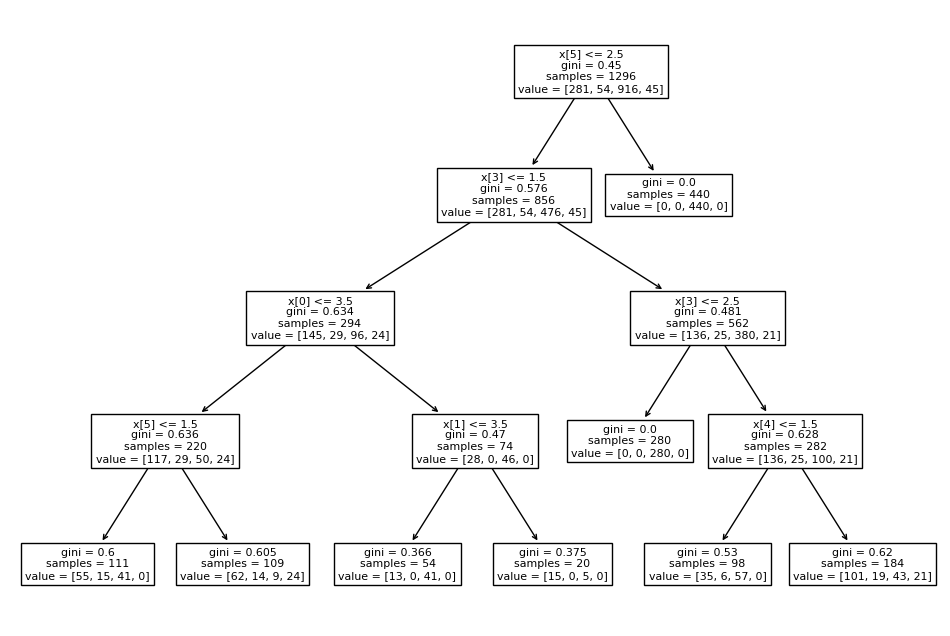

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))


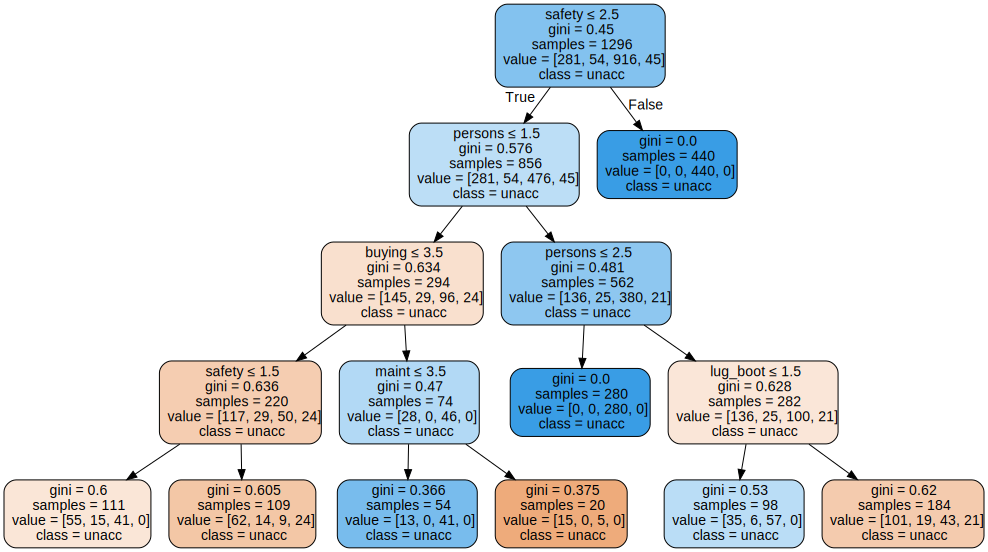

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph